In [17]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
import numpy as np

import module
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 모든 행 출력 설정
pd.set_option('display.max_rows', None)


In [39]:
df = module.file_load.load_origin_train()

In [40]:
# module.preprocess.시_군_구_add(df)

In [46]:
df['좌표X'].isnull().sum(), df['좌표Y'].isnull().sum()

(869670, 869670)

In [42]:
좌표XY = df[['좌표X', '좌표Y','target']]

In [43]:
좌표XY['target'].describe()

count    1.118822e+06
mean     5.799153e+04
std      4.642602e+04
min      3.500000e+02
25%      3.050000e+04
50%      4.480000e+04
75%      6.980000e+04
max      1.450000e+06
Name: target, dtype: float64

In [47]:
# 좌표X와 좌표Y의 결측치 개수
missing_count_x = df['좌표X'].isnull().sum()
missing_count_y = df['좌표Y'].isnull().sum()

# 전체 데이터에서의 결측치 비율 계산
total_rows = len(df)
missing_ratio_x = (missing_count_x / total_rows) * 100
missing_ratio_y = (missing_count_y / total_rows) * 100

missing_count_x, missing_count_y, missing_ratio_x, missing_ratio_y


(869670, 869670, 77.7308633544925, 77.7308633544925)

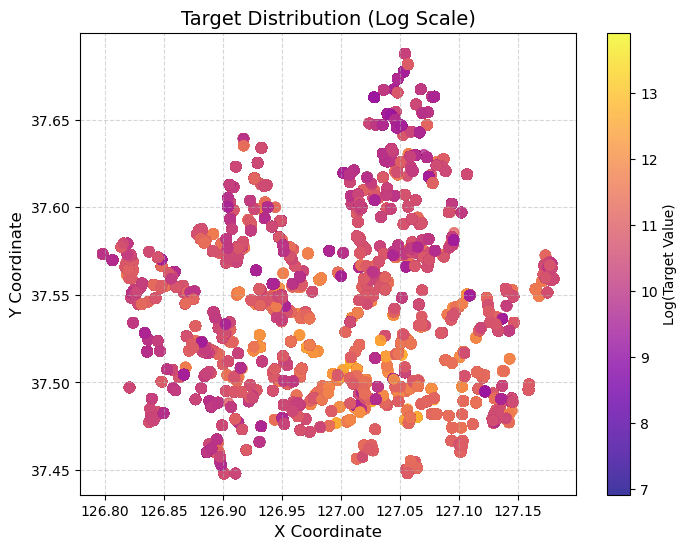

In [45]:
좌표XY['log_target'] = np.log1p(좌표XY['target'])  # log(1 + target)로 변환

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    좌표XY['좌표X'], 
    좌표XY['좌표Y'], 
    c=좌표XY['log_target'], 
    cmap='plasma',  # 고대비 컬러맵
    s=50, 
    alpha=0.8
)
plt.colorbar(scatter, label='Log(Target Value)')  # 색상 바 추가

plt.title('Target Distribution (Log Scale)', fontsize=14)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# 그래프 표시
plt.show()

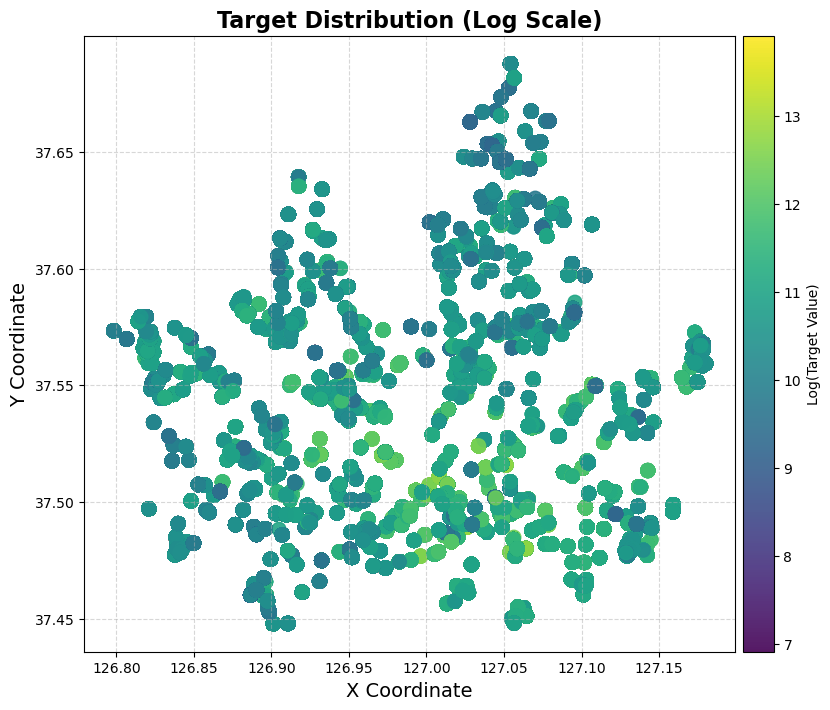

In [48]:
import numpy as np

# 타겟 값 로그 스케일 변환
좌표XY['log_target'] = np.log1p(좌표XY['target'])  # log(1 + target) 변환

# 타겟 값에 따라 색상 지정
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    좌표XY['좌표X'],
    좌표XY['좌표Y'],
    c=좌표XY['log_target'],
    cmap='viridis',  # 높은 가격은 밝고, 낮은 가격은 어둡게 표현
    s=100,  # 점 크기 확대
    alpha=0.9
)
plt.colorbar(scatter, label='Log(Target Value)', pad=0.01)  # 색상 바 추가

# 그래프 설정
plt.title('Target Distribution (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('X Coordinate', fontsize=14)
plt.ylabel('Y Coordinate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# 그래프 표시
plt.show()
